In [ ]:
# In this notebook we will develope visuals (not an interactive dashboard) for "Toman Bike Rentals" to display 
# key performance metrics for informed decison making.
# Requirements:
# Hourly revenue analysis
# Seasonal Revenue
# Rider Demographics
# Profit and revenue trends

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db0 = pd.read_csv('bike_share_yr_0.csv')
db1 = pd.read_csv('bike_share_yr_1.csv')
dbc = pd.read_csv('cost_table.csv')

In [3]:
db0.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rider_type,riders
0,1/1/2021,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,casual,3
1,1/1/2021,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,casual,8
2,1/1/2021,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,casual,5
3,1/1/2021,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,casual,3
4,1/1/2021,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,casual,0


In [4]:
#making sure both data bases contain similar info
db1.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rider_type,riders
0,1/1/2022,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,casual,5
1,1/1/2022,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,casual,15
2,1/1/2022,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,casual,16
3,1/1/2022,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,casual,11
4,1/1/2022,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,casual,0


In [5]:
dbc.head()

,yr,price,COGS
0,0,3.99,1.24
1,1,4.99,1.56


In [7]:
# unite all bike data into one table for easier access
bike_data = pd.concat([db0, db1], ignore_index =True)

# merge with cost table
bike_data = bike_data.merge(dbc, on="yr", how="left")

In [8]:
# Add Revenue, Cost and Profit columns in db0 and db1 according to dbc
bike_data["revenue"] = bike_data["riders"] * bike_data["price"]
bike_data["cost"] = bike_data["riders"] * bike_data["COGS"]
bike_data["profit"] = bike_data["revenue"] - bike_data["cost"]

In [12]:
# View table
bike_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rider_type,riders,price,COGS,revenue,cost,profit
0,1/1/2021,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,casual,3,3.99,1.24,11.97,3.72,8.25
1,1/1/2021,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,casual,8,3.99,1.24,31.92,9.92,22.00
2,1/1/2021,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,casual,5,3.99,1.24,19.95,6.20,13.75
3,1/1/2021,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,casual,3,3.99,1.24,11.97,3.72,8.25
4,1/1/2021,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,casual,0,3.99,1.24,0.00,0.00,0.00


In [21]:
# Plot revenue by hour split by year
# first group by hour and year
hour_year = (
    bike_data.groupby(["hr", "yr"], as_index=False)["revenue"]
        .sum()
        .sort_values(["hr", "yr"])
)

# Wide format: columns = years, rows = hours
pivot = hour_year.pivot(index="hr", columns="yr", values="revenue").fillna(0)
pivot = pivot.reindex(range(24), fill_value=0)  # make sure hours 0..23 exist
pivot.columns = [f"20{21 + c}" for c in pivot.columns]  # rename 0->2021, 1->2022

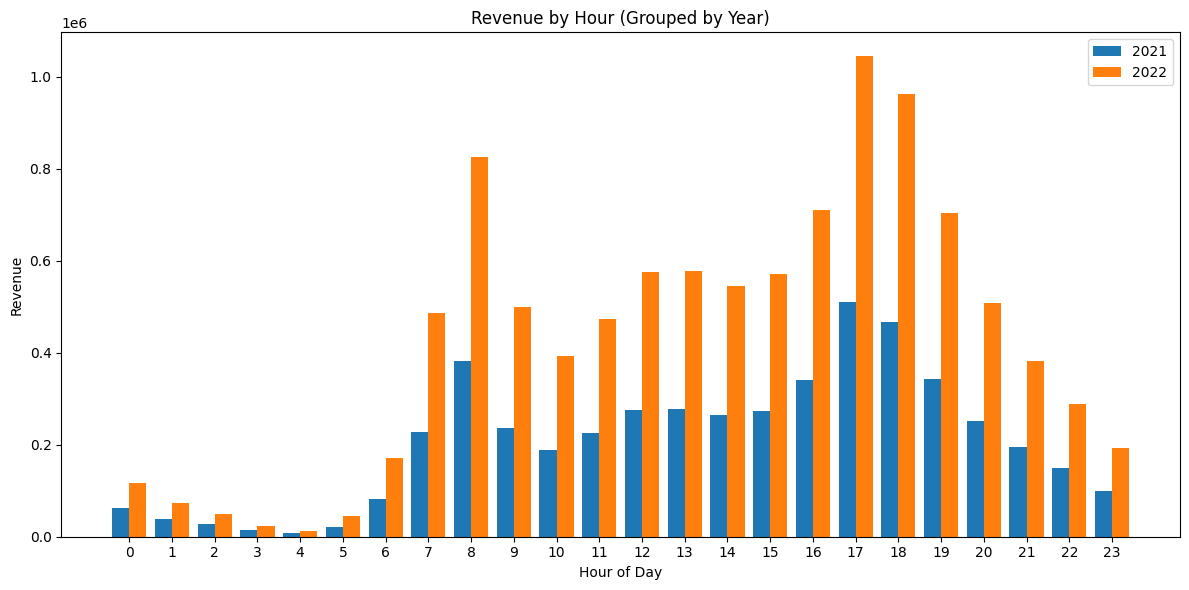

In [20]:
# Create Grouped bar plot
x = np.arange(len(pivot.index))        
width = 0.4                             

plt.figure(figsize=(12,6))
plt.bar(x - width/2, pivot["2021"], width, label="2021")
plt.bar(x + width/2, pivot["2022"], width, label="2022")

plt.title("Revenue by Hour (Grouped by Year)")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue ($)")
plt.xticks(x, pivot.index)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Insight : There are 2 peaks of activity which are consistent throught the years.
# The first is in the morning at 8 A.M, this peak is short termed, most likely due to people going on a ride before work.
# The second peak is at around 17 P.M, this peak is longer and it can be said that the time range around 17, which
# starts at 16-19 has the highest revenue (and users) in both years. This is likely explained by the fact that people
# come for a ride after work and come back home in time for dinner etc. Overall these trends make a lot of sense.

In [36]:
#seperating seasons by season
db0["season"].unique()

#mapping the seasons
season_map = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
bike_data["season_name"] = bike_data["season"].map(season_map)

# Aggregate revenue
rev_2021 = bike_data[bike_data["yr"]==0].groupby("season_name")["revenue"].sum()
rev_2022 = bike_data[bike_data["yr"]==1].groupby("season_name")["revenue"].sum()
rev_total = bike_data.groupby("season_name")["revenue"].sum()

# Ensure same season order
seasons = ["Winter","Spring","Summer","Fall"]
rev_2021, rev_2022, rev_total = rev_2021.reindex(seasons), rev_2022.reindex(seasons), rev_total.reindex(seasons)


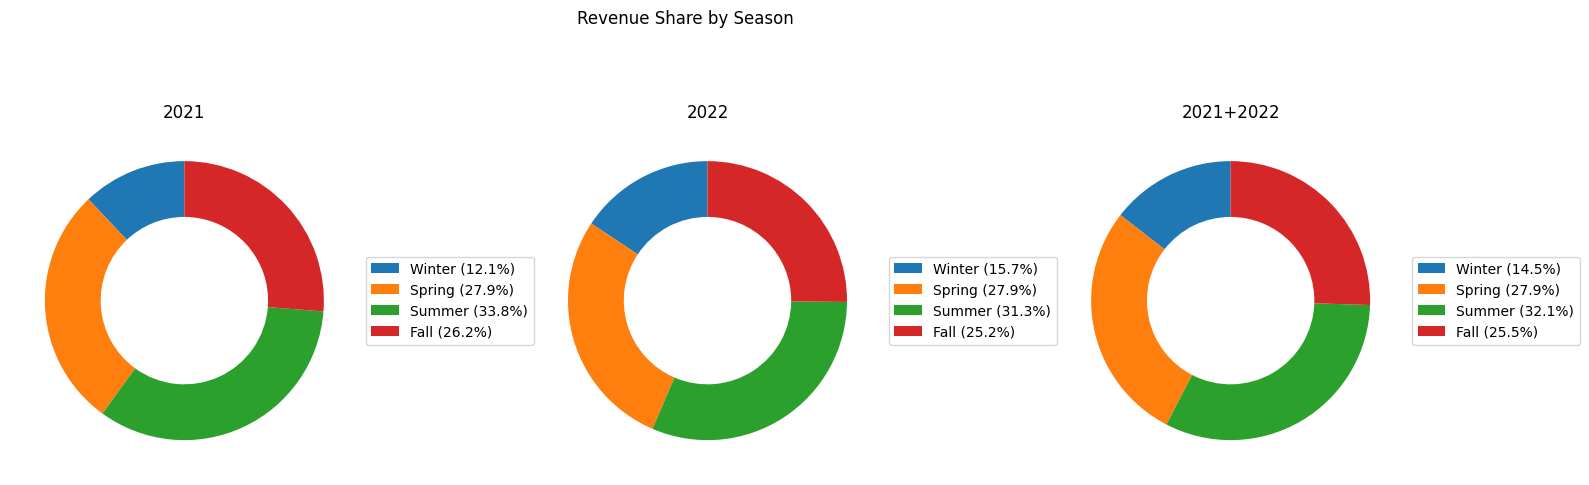

In [40]:
# Plot 3 donuts side by side

# Compute percentages
def add_percent_labels(data):
    total = data.sum()
    return [f"{season} ({val/total:.1%})" for season, val in data.items()]

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, data, title in zip(
    axes,
    [rev_2021, rev_2022, rev_total],
    ["2021", "2022", "2021+2022"]
):
    wedges, texts = ax.pie(
        data,
        labels=None,               # no labels on wedges
        startangle=90,
        wedgeprops=dict(width=0.4)
    )
    ax.set_title(title)
    # put legend on side
    ax.legend(wedges, add_percent_labels(data), loc="center left", bbox_to_anchor=(1,0.5))


plt.suptitle("Revenue Share by Season")
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
# Insight : The highest percentage of revenue and users is during the summer, 
# followed by the Spring, the Fall and lastly the Winter. This trend repeats itself during both years.

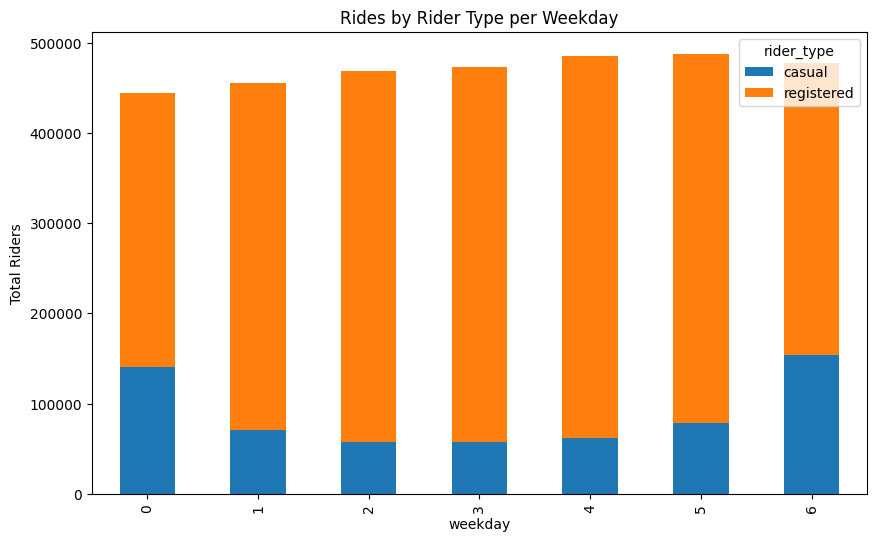

In [52]:
# Next we want to observe Demographics and Riding trends (years, month, day, hour, season)
bike_data["rider_type"].unique()

rider_weekday = bike_data.groupby(["weekday","rider_type"])["riders"].sum().unstack()
rider_weekday.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Rides by Rider Type per Weekday")
plt.ylabel("Total Riders")
plt.show()


In [ ]:
# Insight : Registered riders rent much more than casual riders. 
# Registered riders rent more during the week than on the weekend, while for casual riders its the other way around.

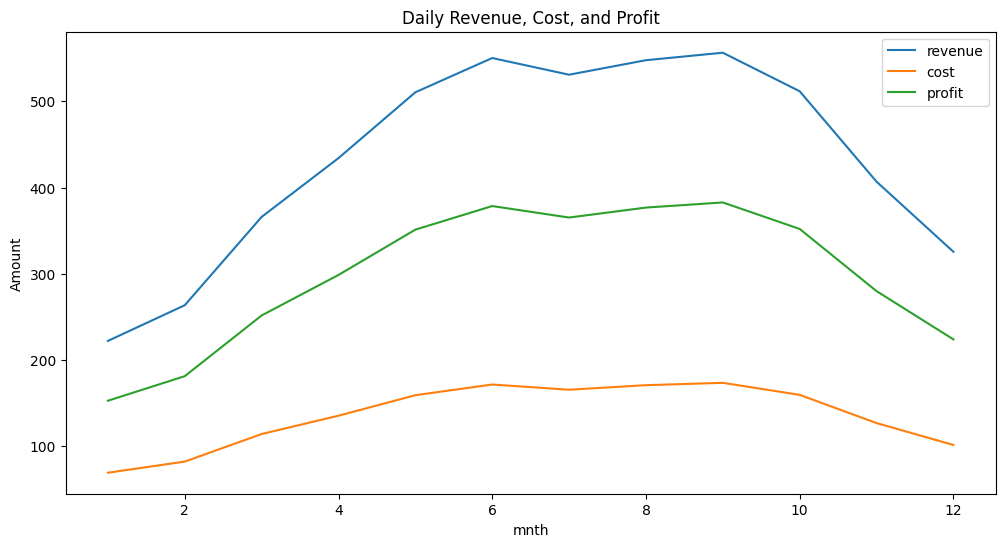

In [74]:
# Now we want to observe monthly changes in costs and income

daily = bike_data.groupby("mnth")[["revenue","cost","profit"]].mean()

daily.plot(figsize=(12,6))
plt.title("Daily Revenue, Cost, and Profit")
plt.ylabel("Amount")
plt.show()


In [ ]:
# Insight : Daily revenue, cost and profit increase March to November with a peak lasting June to August which sits in
# line with the previous results regarding seasonality, higher profit, higher revenue and higher cost.

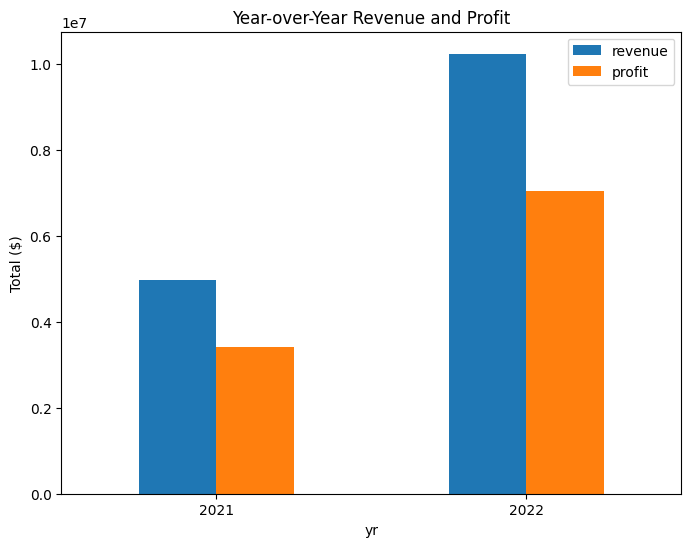

YoY revenue increased in 106% and profit increased in 105%


In [65]:
# From previous analysis its clear profit has increased in 2022 and we want to 
# understand how much in total and in percentage:

summary = bike_data.groupby("yr")[["revenue","profit"]].sum().reset_index()
summary["yr"] = summary["yr"].map({0:"2021", 1:"2022"})

summary.plot(
    x="yr", y=["revenue","profit"], kind="bar",
    figsize=(8,6), rot=0
)
plt.title("Year-over-Year Revenue and Profit")
plt.ylabel("Total ($)")
plt.show()

revenue_change = ((summary["revenue"][1] - summary["revenue"][0]) / summary["revenue"][0]) * 100
profit_change = ((summary["profit"][1] - summary["profit"][0]) / summary["profit"][0]) * 100
print("YoY revenue increased in %d%% and profit increased in %d%%" % (revenue_change, profit_change))

In [66]:
# Insight : Revenue and Profit doubled within a year!

In [72]:
# Lets see where the new riders were coming from
rider_counts = bike_data.groupby(["yr", "rider_type"])["riders"].sum().reset_index()
rider_counts["yr"] = rider_counts["yr"].map({0: "2021", 1: "2022"})
share = rider_counts.copy()
share["percent"] = share.groupby("yr")["riders"].transform(lambda x: x / x.sum() * 100)
print(share)


     yr  rider_type   riders    percent
0  2021      casual   247252  19.889905
1  2021  registered   995851  80.110095
2  2022      casual   372765  18.187420
3  2022  registered  1676811  81.812580


In [73]:
# Insight : According to the table, the increase in revenue is due to a larger number 
# of obth registered and casual riders while the larger increase was in registered riders (over 50% increase)
# while the overall share of each type stayed the same (around 80% of registered and 20% of casual